In [2]:
import pandas as pd
df = pd.read_csv('Tweets.csv')
print(df.shape)
print(df['airline_sentiment'].value_counts())

(14640, 15)
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


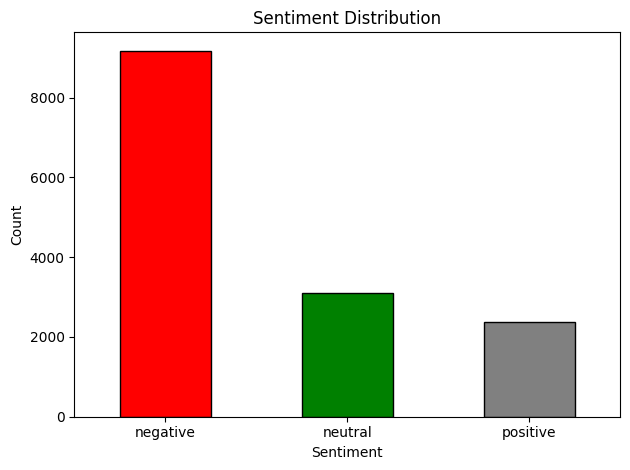

In [3]:
import matplotlib.pyplot as plt

df['airline_sentiment'].value_counts().plot(
    kind='bar',
    color=['red', 'green', 'gray'],
    edgecolor='black'
)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


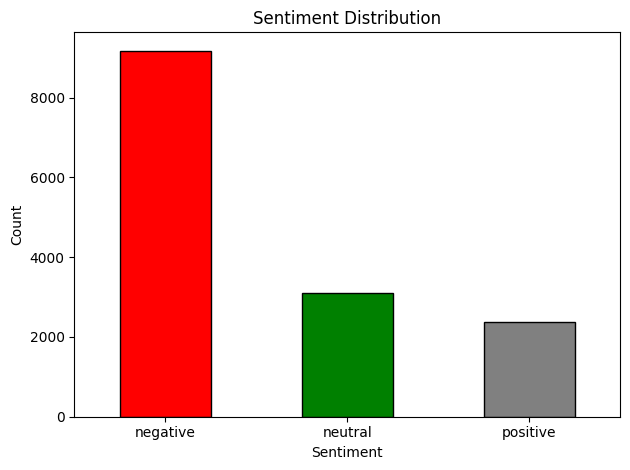

In [3]:
import re
import ssl
import nltk

# Fix SSL for Mac
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    text = text.strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

print("ORIGINAL:", df['text'][0])
print("\nCLEANED: ", df['clean_text'][0])

In [4]:
import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase everything
    text = text.lower()
    # Remove @mentions like @united
    text = re.sub(r'@\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords (words like "the", "is", "and")
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove extra spaces
    text = text.strip()
    return text

# Apply cleaning to every tweet
df['clean_text'] = df['text'].apply(clean_text)

# See the before and after
print("ORIGINAL:", df['text'][0])
print("\nCLEANED: ", df['clean_text'][0])


ORIGINAL: @VirginAmerica What @dhepburn said.

CLEANED:  said


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manojannigeri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/manojannigeri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


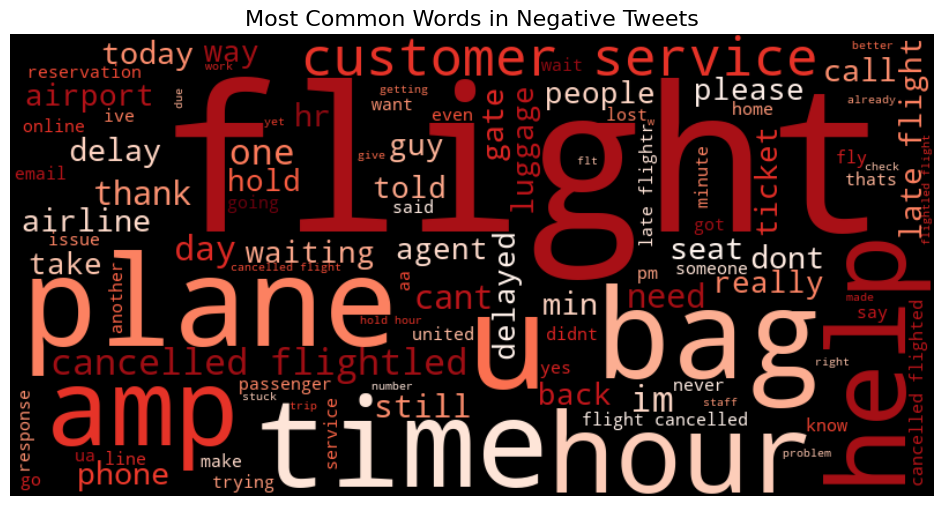

In [5]:
from wordcloud import WordCloud

negative_tweets = ' '.join(df[df['airline_sentiment'] == 'negative']['clean_text'])

wordcloud = WordCloud(
    width=800, height=400,
    background_color='black',
    colormap='Reds',
    max_words=100
).generate(negative_tweets)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Tweets', fontsize=16)
plt.show()

In [6]:
df[['text', 'clean_text', 'airline_sentiment']].to_csv('cleaned_tweets.csv', index=False)
print("✅ Cleaned data saved!")

✅ Cleaned data saved!
